# Problem Statement – 3D Visualization of House Price Regression

Write a **Python program** to draw a **3D plot** that visualizes the **regression model** for **house price prediction** using suitable **Python-based 3D plotting libraries**.

---

## Features Used

The regression model is built using the following features:

- **Area (sq ft)**
- **Number of Bedrooms**
- **House Price**

---

## Objective

- Visualize how **house area** and **number of bedrooms** affect **house price**
- Represent the **regression surface (plane)** in 3D space
- Improve interpretability of the regression model


Coefficients (area, bedrooms): [   81.12336239 10107.71268136] Intercept: 48528.07935176478


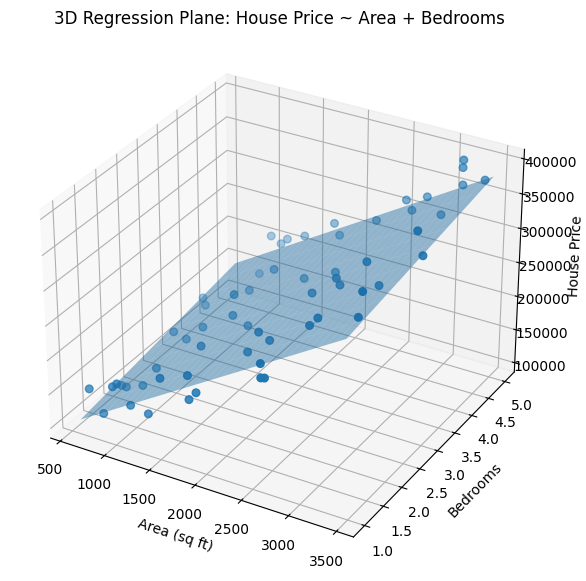

In [1]:
# 3D plot for house price regression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

np.random.seed(1)
n = 60
area = np.random.uniform(600, 3500, n)            # sq ft
bedrooms = np.random.randint(1,6, n)              # integer bedrooms
# synthetic price: base + area factor + bedroom factor + noise
price = 50000 + 80*area + 12000*bedrooms + np.random.normal(0,20000,n)

# fit model
X_house = np.column_stack([area, bedrooms])
lr_house = LinearRegression().fit(X_house, price)
print("Coefficients (area, bedrooms):", lr_house.coef_, "Intercept:", lr_house.intercept_)

# prepare grid
area_grid, bed_grid = np.meshgrid(np.linspace(area.min(), area.max(), 30),
                                  np.linspace(bedrooms.min(), bedrooms.max(), 10))
Z = lr_house.intercept_ + lr_house.coef_[0]*area_grid + lr_house.coef_[1]*bed_grid

# plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(area, bedrooms, price, s=30)
ax.plot_surface(area_grid, bed_grid, Z, alpha=0.45)
ax.set_xlabel('Area (sq ft)')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('House Price')
ax.set_title('3D Regression Plane: House Price ~ Area + Bedrooms')
plt.show()
